# Linear Model for Classification

In [1]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

Let's see the Determinant Boundary of Logistic Regression, Linear Support Vector Classifier

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [3]:
X, y = mglearn.datasets.make_forge()

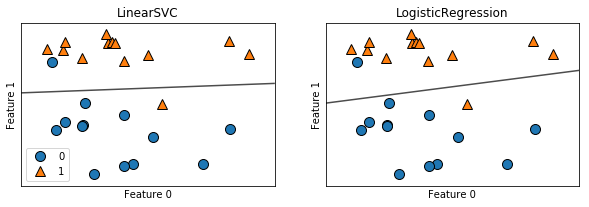

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

### Loss Function
In these two algorithm, they use differnet loss function.

**Logistic Regression** uses logistic loss function for binary classification and cross-entropy for multi-class classification.

**Linear SVC** uses squared hinge loss function.

### Regularization

Using L2 regulaization (parameter = C), they regularize model. Same with Ridge regression.

## Multi-Class classification

Most of linear model support binary classification.

Method to expand binary classifier to multi-class classifier is **one-vs.-all(rest)**.

### Data set

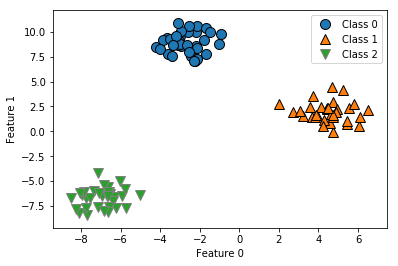

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

### Train linearSVC classifier

In [7]:
linear_svm = LinearSVC().fit(X,y)
print("Coef shape: ", linear_svm.coef_.shape)
print("inter shape: ", linear_svm.intercept_.shape)

Coef shape:  (3, 2)
inter shape:  (3,)


It means coef and intercept of three different  classifier for one class.

This is Determinant Boundary

Text(0,0.5,'Feature 1')

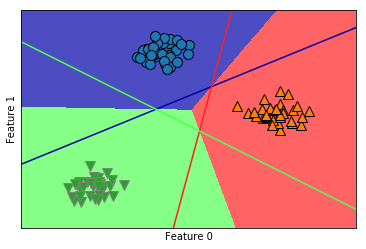

In [10]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

This is multi-class Determinant Boundary which consists of three 1-vs-all classifier.

## Summary

## L1 or L2 ?

If you think there are not many meaningful feature -> L1

If not, it is common to use -> L2

If it is important to interpret the model -> L1, Because it makes some 'w' real 0. It means that L1 uses part of features.

